In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import time

In [2]:
dataset_1 = pd.read_csv('./data/[1m]BTCUSDT_part_1.csv')
dataset_2 = pd.read_csv('./data/2021-[1m]-BTCUSDT_part_2.csv')

In [3]:
display(dataset_1)
display(dataset_2)

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502942459999,4261.48,4261.48,4261.48,4261.48,1.775183
1,1502942460000,1502942519999,4261.48,4261.48,4261.48,4261.48,0.000000
2,1502942520000,1502942579999,4280.56,4280.56,4280.56,4280.56,0.261074
3,1502942580000,1502942639999,4261.48,4261.48,4261.48,4261.48,0.012008
4,1502942640000,1502942699999,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...,...
1767788,1609458960000,1609459019999,28978.91,28975.06,28969.99,28988.06,19.086172
1767789,1609459020000,1609459079999,28975.06,28975.03,28955.35,28981.41,21.327772
1767790,1609459080000,1609459139999,28975.03,28923.67,28923.15,28977.10,36.070975
1767791,1609459140000,1609459199999,28923.66,28923.63,28903.86,28952.28,51.895343


,Start,Stop,Open,Close,Low,High,Volume
0,1609459200000,1609459259999,28923.63,28961.66,28913.12,28961.66,27.457032
1,1609459260000,1609459319999,28961.67,29009.91,28961.01,29017.50,58.477501
2,1609459320000,1609459379999,29009.54,28989.30,28973.58,29016.71,42.470329
3,1609459380000,1609459439999,28989.68,28982.69,28972.33,28999.85,30.360677
4,1609459440000,1609459499999,28982.67,28975.65,28971.80,28995.93,24.124339
...,...,...,...,...,...,...,...
56874,1612871640000,1612871699999,46572.25,46522.43,46520.00,46597.77,45.798019
56875,1612871700000,1612871759999,46526.72,46473.62,46437.60,46542.27,53.433872
56876,1612871760000,1612871819999,46470.43,46415.87,46405.00,46485.61,41.898893
56877,1612871820000,1612871879999,46415.86,46499.98,46357.14,46499.99,79.016921


In [4]:
dataset_1['Start'] = pd.to_datetime(dataset_1["Start"].to_numpy(), unit='ms')
dataset_1['Stop'] = pd.to_datetime(dataset_1["Stop"].to_numpy(), unit='ms')

dataset_2['Start'] = pd.to_datetime(dataset_2["Start"].to_numpy(), unit='ms')
dataset_2['Stop'] = pd.to_datetime(dataset_2["Stop"].to_numpy(), unit='ms')

In [5]:
display(dataset_1)
display(dataset_2)

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:00:59.999,4261.48,4261.48,4261.48,4261.48,1.775183
1,2017-08-17 04:01:00,2017-08-17 04:01:59.999,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:02:00,2017-08-17 04:02:59.999,4280.56,4280.56,4280.56,4280.56,0.261074
3,2017-08-17 04:03:00,2017-08-17 04:03:59.999,4261.48,4261.48,4261.48,4261.48,0.012008
4,2017-08-17 04:04:00,2017-08-17 04:04:59.999,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...,...
1767788,2020-12-31 23:56:00,2020-12-31 23:56:59.999,28978.91,28975.06,28969.99,28988.06,19.086172
1767789,2020-12-31 23:57:00,2020-12-31 23:57:59.999,28975.06,28975.03,28955.35,28981.41,21.327772
1767790,2020-12-31 23:58:00,2020-12-31 23:58:59.999,28975.03,28923.67,28923.15,28977.10,36.070975
1767791,2020-12-31 23:59:00,2020-12-31 23:59:59.999,28923.66,28923.63,28903.86,28952.28,51.895343


,Start,Stop,Open,Close,Low,High,Volume
0,2021-01-01 00:00:00,2021-01-01 00:00:59.999,28923.63,28961.66,28913.12,28961.66,27.457032
1,2021-01-01 00:01:00,2021-01-01 00:01:59.999,28961.67,29009.91,28961.01,29017.50,58.477501
2,2021-01-01 00:02:00,2021-01-01 00:02:59.999,29009.54,28989.30,28973.58,29016.71,42.470329
3,2021-01-01 00:03:00,2021-01-01 00:03:59.999,28989.68,28982.69,28972.33,28999.85,30.360677
4,2021-01-01 00:04:00,2021-01-01 00:04:59.999,28982.67,28975.65,28971.80,28995.93,24.124339
...,...,...,...,...,...,...,...
56874,2021-02-09 11:54:00,2021-02-09 11:54:59.999,46572.25,46522.43,46520.00,46597.77,45.798019
56875,2021-02-09 11:55:00,2021-02-09 11:55:59.999,46526.72,46473.62,46437.60,46542.27,53.433872
56876,2021-02-09 11:56:00,2021-02-09 11:56:59.999,46470.43,46415.87,46405.00,46485.61,41.898893
56877,2021-02-09 11:57:00,2021-02-09 11:57:59.999,46415.86,46499.98,46357.14,46499.99,79.016921


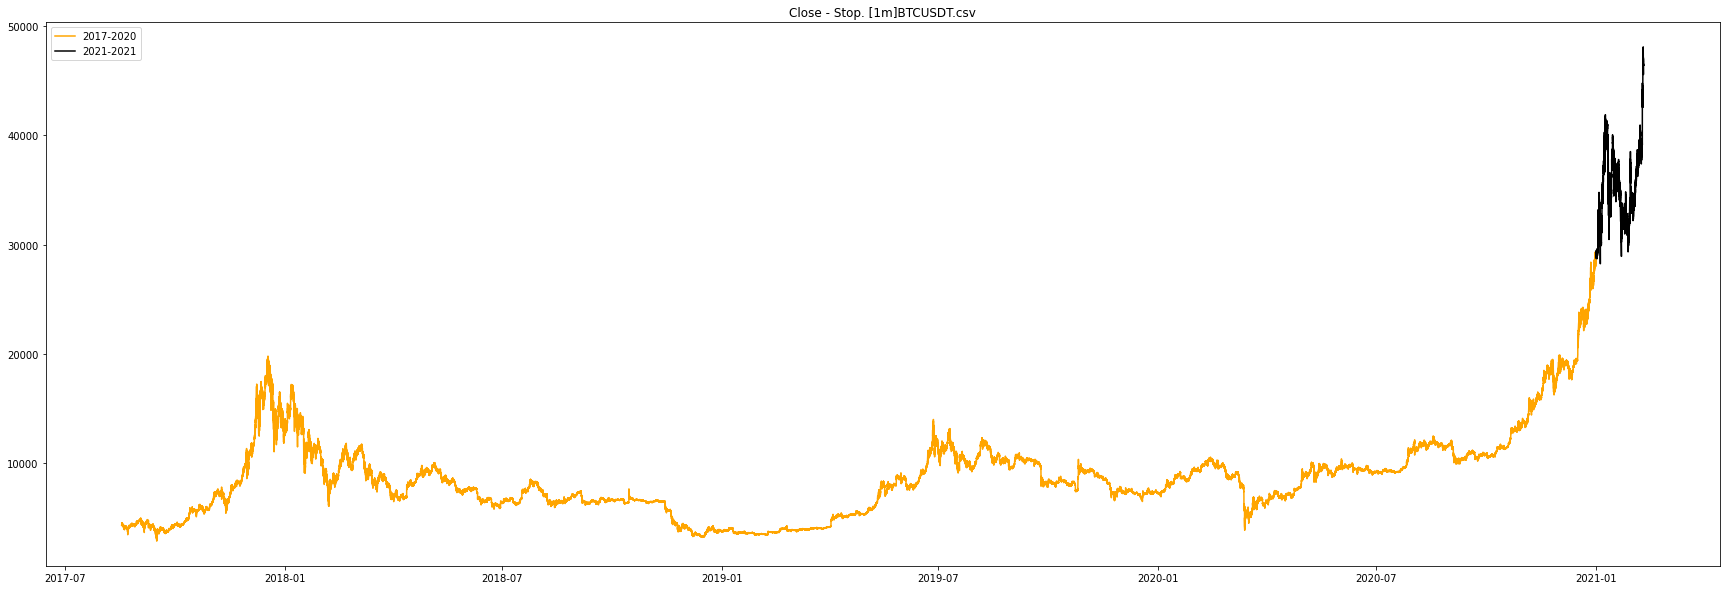

In [6]:
plt.figure(figsize=(30,10))
plt.plot(dataset_1['Stop'], dataset_1['Close'], color='orange', label='2017-2020')
plt.plot(dataset_2['Stop'], dataset_2['Close'], color='black', label='2021-2021')
plt.title('Close - Stop. [1m]BTCUSDT.csv')
plt.legend()
plt.show()

In [7]:
x_train = dataset_1['Stop'].to_numpy()[-1500:]
y_train = dataset_1['Close'].to_numpy()[-1500:]
x_test = dataset_2['Stop'].to_numpy()
y_test = dataset_2['Close'].to_numpy()

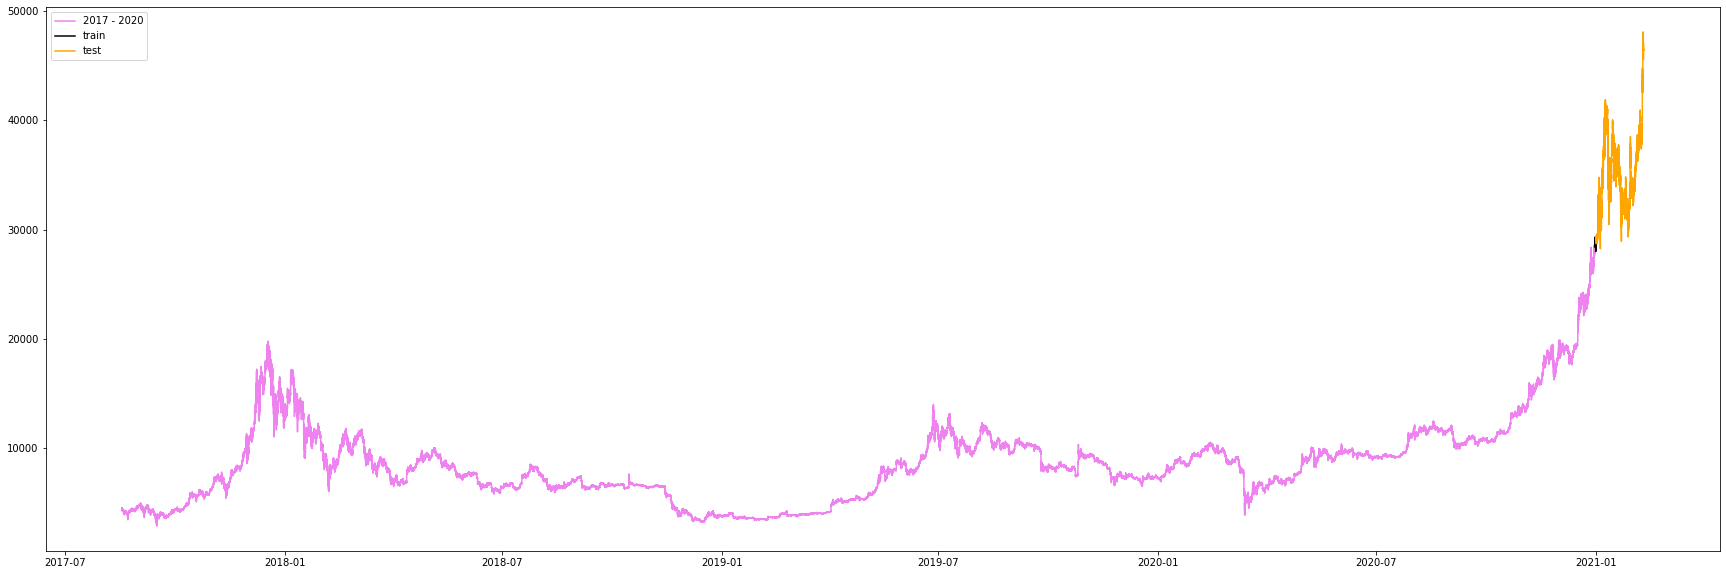

In [8]:
plt.figure(figsize=(30,10))
plt.plot(dataset_1['Stop'], dataset_1['Close'], color='violet', label='2017 - 2020')
plt.plot(x_train, y_train, color ='black', label='train')
plt.plot(x_test, y_test, color ='orange', label='test')
plt.legend()
plt.show()

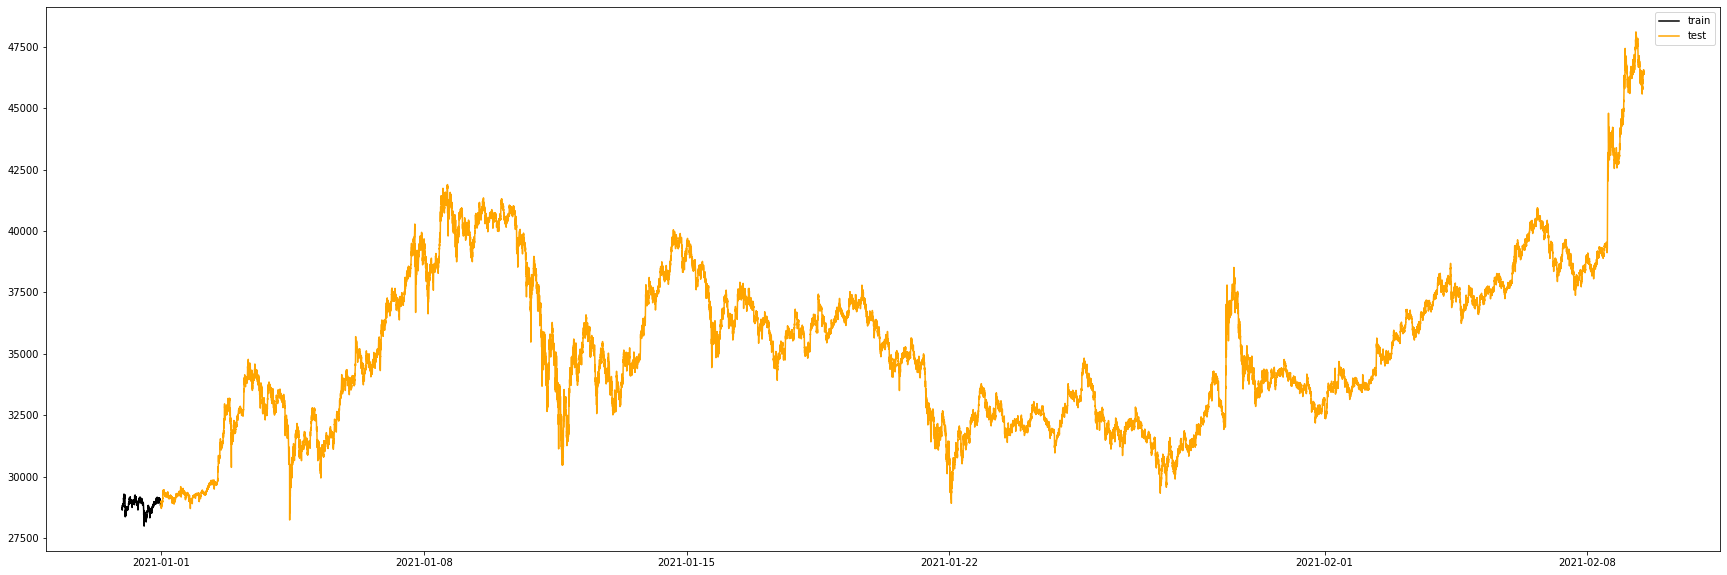

In [9]:
plt.figure(figsize=(30,10))
plt.plot(x_train, y_train, color ='black', label='train')
plt.plot(x_test, y_test, color='orange', label='test')
plt.legend()
plt.show()

{'p': 3, 'd': 0, 'q': 0, 'Root Mean Square Error': 7235.775790609097, 'Mean Absolute Error': 6416.283334654193, 'Mean Absolute Percentage Error': 0.17477702626758654, 'time_spend': 0.21601629257202148, 'prediction': array([28961.77549862, 28959.36032946, 28958.24068967, ...,
       28853.5906859 , 28853.5906859 , 28853.5906859 ])}
{'p': 3, 'd': 0, 'q': 1, 'Root Mean Square Error': 7235.7983004266725, 'Mean Absolute Error': 6416.3034697352105, 'Mean Absolute Percentage Error': 0.17477757106723404, 'time_spend': 1.1548163890838623, 'prediction': array([28962.64004217, 28960.69011328, 28959.08921277, ...,
       28853.56496828, 28853.56496828, 28853.56496828])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 2, 'Root Mean Square Error': 7235.777940002432, 'Mean Absolute Error': 6416.294962619096, 'Mean Absolute Percentage Error': 0.17477741324560064, 'time_spend': 1.7868835926055908, 'prediction': array([28959.21631371, 28957.85123443, 28958.33744795, ...,
       28853.58885409, 28853.58885409, 28853.58885409])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 3, 'Root Mean Square Error': 7235.777823703374, 'Mean Absolute Error': 6416.293406468965, 'Mean Absolute Percentage Error': 0.1747773603486024, 'time_spend': 2.3331785202026367, 'prediction': array([28959.43657267, 28958.51480079, 28958.80443442, ...,
       28853.58888994, 28853.58888994, 28853.58888994])}
{'p': 3, 'd': 1, 'q': 0, 'Root Mean Square Error': 7140.399542353239, 'Mean Absolute Error': 6308.815265953458, 'Mean Absolute Percentage Error': 0.1717051209053632, 'time_spend': 0.12034225463867188, 'prediction': array([28963.4559703 , 28961.99201363, 28961.2786591 , ...,
       28961.35071268, 28961.35071268, 28961.35071268])}
{'p': 3, 'd': 1, 'q': 1, 'Root Mean Square Error': 7140.03370336901, 'Mean Absolute Error': 6308.402362552717, 'Mean Absolute Percentage Error': 0.17169331885278621, 'time_spend': 0.5088179111480713, 'prediction': array([28963.80762495, 28962.9955492 , 28962.36994053, ...,
       28961.76479457, 28961.76479457, 28961.76479457])}
{'p': 

c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 3, 'Root Mean Square Error': 7146.8477890027425, 'Mean Absolute Error': 6316.09288149803, 'Mean Absolute Percentage Error': 0.17191314234809923, 'time_spend': 1.582350254058838, 'prediction': array([28961.97614682, 28958.61156055, 28954.71944423, ...,
       28954.05312036, 28954.05312036, 28954.05312036])}
{'p': 3, 'd': 2, 'q': 0, 'Root Mean Square Error': 168703.80431506876, 'Mean Absolute Error': 144858.93239298093, 'Mean Absolute Percentage Error': 4.090661667028136, 'time_spend': 0.10100626945495605, 'prediction': array([ 28960.4163938 ,  28955.71815597,  28963.2743308 , ...,
       331292.02487484, 331297.34059736, 331302.65631988])}
{'p': 3, 'd': 2, 'q': 1, 'Root Mean Square Error': 4079.9765415810534, 'Mean Absolute Error': 3384.4825560394606, 'Mean Absolute Percentage Error': 0.09486883217857493, 'time_spend': 1.3321013450622559, 'prediction': array([28963.67580346, 28962.45060526, 28961.96508369, ...,
       40368.52874272, 40368.72930004, 40368.92985736

c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 2, 'q': 2, 'Root Mean Square Error': 4154.0338283725505, 'Mean Absolute Error': 3492.136968398599, 'Mean Absolute Percentage Error': 0.0982369548360986, 'time_spend': 1.8934237957000732, 'prediction': array([28963.71692155, 28961.75858039, 28961.79929301, ...,
       40980.22987252, 40980.44118739, 40980.65250225])}


c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 2, 'q': 3, 'Root Mean Square Error': 4098.727695160943, 'Mean Absolute Error': 3414.780472518554, 'Mean Absolute Percentage Error': 0.09582512855913518, 'time_spend': 2.4033567905426025, 'prediction': array([28961.99270269, 28964.6023739 , 28961.75343636, ...,
       40551.14334865, 40551.3470942 , 40551.55083976])}
{'p': 4, 'd': 0, 'q': 0, 'Root Mean Square Error': 7235.775575691572, 'Mean Absolute Error': 6416.279285939334, 'Mean Absolute Percentage Error': 0.17477688794200708, 'time_spend': 0.16107535362243652, 'prediction': array([28962.34598537, 28959.96447069, 28958.40586961, ...,
       28853.59068596, 28853.59068596, 28853.59068596])}
{'p': 4, 'd': 0, 'q': 1, 'Root Mean Square Error': 7235.776107615852, 'Mean Absolute Error': 6416.288637797884, 'Mean Absolute Percentage Error': 0.17477720722926893, 'time_spend': 0.5565371513366699, 'prediction': array([28962.05549065, 28959.50070809, 28958.12385155, ...,
       28853.59064133, 28853.59064133, 28853.59064133])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 2, 'Root Mean Square Error': 7235.778135544172, 'Mean Absolute Error': 6416.298953873973, 'Mean Absolute Percentage Error': 0.17477754977638055, 'time_spend': 2.5532140731811523, 'prediction': array([28959.64481863, 28958.45186755, 28958.79087952, ...,
       28853.58887047, 28853.58887047, 28853.58887047])}
{'p': 4, 'd': 0, 'q': 3, 'Root Mean Square Error': 7235.781902107548, 'Mean Absolute Error': 6416.314642354255, 'Mean Absolute Percentage Error': 0.17477806620804082, 'time_spend': 2.9182231426239014, 'prediction': array([28958.87617945, 28958.81229806, 28956.99757786, ...,
       28853.58536218, 28853.58536218, 28853.58536218])}
{'p': 4, 'd': 1, 'q': 0, 'Root Mean Square Error': 7140.1755701395405, 'Mean Absolute Error': 6308.5624630941, 'Mean Absolute Percentage Error': 0.17169789491422593, 'time_spend': 0.2813737392425537, 'prediction': array([28963.41251037, 28963.12208887, 28962.46291849, ...,
       28961.60421913, 28961.60421913, 28961.60421913])}
{'p':

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 3, 'Root Mean Square Error': 7141.433147995286, 'Mean Absolute Error': 6309.981806437639, 'Mean Absolute Percentage Error': 0.17173846420611083, 'time_spend': 1.8542625904083252, 'prediction': array([28962.24395651, 28959.37039679, 28960.82136269, ...,
       28960.18083828, 28960.18083828, 28960.18083828])}
{'p': 4, 'd': 2, 'q': 0, 'Root Mean Square Error': 71976.1565264135, 'Mean Absolute Error': 61034.49887500469, 'Mean Absolute Percentage Error': 1.7271260187181148, 'time_spend': 0.2840251922607422, 'prediction': array([ 28959.84890218,  28956.24801106,  28952.23052115, ...,
       163650.8008727 , 163653.1691532 , 163655.5374337 ])}
{'p': 4, 'd': 2, 'q': 1, 'Root Mean Square Error': 4074.2577896321764, 'Mean Absolute Error': 3374.7239554601542, 'Mean Absolute Percentage Error': 0.09456002963848845, 'time_spend': 1.638108253479004, 'prediction': array([28963.6356564 , 28963.55678101, 28963.12679142, ...,
       40308.85107228, 40309.05057579, 40309.2500793 ])}

c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 2, 'q': 3, 'Root Mean Square Error': 4075.42657277326, 'Mean Absolute Error': 3376.5277319387196, 'Mean Absolute Percentage Error': 0.09461598924764457, 'time_spend': 2.6466665267944336, 'prediction': array([28961.91936169, 28960.44463411, 28962.10293052, ...,
       40318.28106365, 40318.48075383, 40318.68044401])}
{'p': 5, 'd': 0, 'q': 0, 'Root Mean Square Error': 7235.776434330789, 'Mean Absolute Error': 6416.280318725967, 'Mean Absolute Percentage Error': 0.17477691787318397, 'time_spend': 0.7293119430541992, 'prediction': array([28962.2877725 , 28960.83783751, 28959.29435323, ...,
       28853.58972206, 28853.58972206, 28853.58972206])}
{'p': 5, 'd': 0, 'q': 1, 'Root Mean Square Error': 7235.794043197492, 'Mean Absolute Error': 6416.295882782884, 'Mean Absolute Percentage Error': 0.17477733758378539, 'time_spend': 1.8561780452728271, 'prediction': array([28962.32775914, 28960.97720719, 28959.80495266, ...,
       28853.56959439, 28853.56959439, 28853.56959439])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 2, 'Root Mean Square Error': 7235.776752512445, 'Mean Absolute Error': 6416.287112290472, 'Mean Absolute Percentage Error': 0.17477715011983885, 'time_spend': 3.1912012100219727, 'prediction': array([28961.28120006, 28957.49639369, 28957.65320376, ...,
       28853.5897847 , 28853.5897847 , 28853.5897847 ])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 3, 'Root Mean Square Error': 7235.776706045158, 'Mean Absolute Error': 6416.292571579616, 'Mean Absolute Percentage Error': 0.17477733927710504, 'time_spend': 3.411433696746826, 'prediction': array([28965.51347773, 28962.84568091, 28957.82308741, ...,
       28853.59014581, 28853.59014581, 28853.59014581])}
{'p': 5, 'd': 1, 'q': 0, 'Root Mean Square Error': 7139.934735980889, 'Mean Absolute Error': 6308.290638175229, 'Mean Absolute Percentage Error': 0.1716901252825042, 'time_spend': 0.15301179885864258, 'prediction': array([28963.51375041, 28963.1932446 , 28963.39380982, ...,
       28961.87681366, 28961.87681366, 28961.87681366])}
{'p': 5, 'd': 1, 'q': 1, 'Root Mean Square Error': 7139.938777832785, 'Mean Absolute Error': 6308.295200100794, 'Mean Absolute Percentage Error': 0.17169025567669507, 'time_spend': 0.18894410133361816, 'prediction': array([28963.51180771, 28963.19054575, 28963.38978513, ...,
       28961.87223877, 28961.87223877, 28961.87223877])}


c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 2, 'Root Mean Square Error': 7141.624543692807, 'Mean Absolute Error': 6310.1977799033575, 'Mean Absolute Percentage Error': 0.17174463719070157, 'time_spend': 1.677905559539795, 'prediction': array([28960.9704927 , 28961.20577827, 28959.50917904, ...,
       28959.96421401, 28959.96421401, 28959.96421401])}


c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 3, 'Root Mean Square Error': 7142.553517879247, 'Mean Absolute Error': 6311.246243593466, 'Mean Absolute Percentage Error': 0.17177460585696316, 'time_spend': 1.9471492767333984, 'prediction': array([28963.0550043 , 28960.69640622, 28959.55080467, ...,
       28958.91281418, 28958.91281418, 28958.91281418])}
{'p': 5, 'd': 2, 'q': 0, 'Root Mean Square Error': 23368.625150746928, 'Mean Absolute Error': 18968.344323303216, 'Mean Absolute Percentage Error': 0.5407125259723873, 'time_spend': 0.536038875579834, 'prediction': array([28960.82968327, 28956.94926872, 28954.08083903, ...,
       79053.78439644, 79054.6652867 , 79055.54617695])}
{'p': 5, 'd': 2, 'q': 1, 'Root Mean Square Error': 4165.848296820158, 'Mean Absolute Error': 3507.5173454919077, 'Mean Absolute Percentage Error': 0.09871278554349831, 'time_spend': 0.8183910846710205, 'prediction': array([28963.75238829, 28963.66036546, 28964.07732915, ...,
       41061.32089977, 41061.53362816, 41061.74635654])}


c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 2, 'q': 2, 'Root Mean Square Error': 4110.873002686515, 'Mean Absolute Error': 3432.8867059804447, 'Mean Absolute Percentage Error': 0.09639185724488332, 'time_spend': 3.1652233600616455, 'prediction': array([28963.43745009, 28963.30417914, 28964.31968115, ...,
       40654.24324543, 40654.44882084, 40654.65439625])}


c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 2, 'q': 3, 'Root Mean Square Error': 4083.054914928967, 'Mean Absolute Error': 3389.540589500538, 'Mean Absolute Percentage Error': 0.09502819318862568, 'time_spend': 3.1542410850524902, 'prediction': array([28962.333775  , 28962.25888893, 28962.43203483, ...,
       40398.53528484, 40398.73637899, 40398.93747313])}


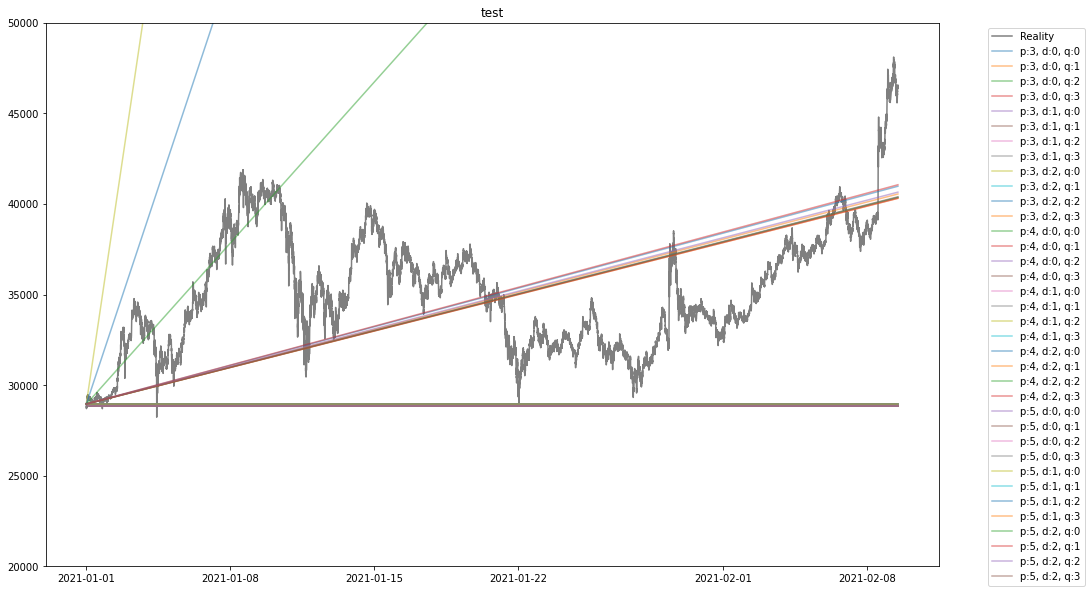

In [10]:
experiments = []
for p in [3, 4, 5]:
    for d in [0, 1, 2]:
        for q in [0, 1, 2, 3]:
            experiment = { 'p': p, 'd': d, 'q': q}
            
            model = ARIMA(y_train, order=(p, d, q))
            
            start_time = time.time()
            model_fit = model.fit()
            time_spend = time.time() - start_time

            predict = model_fit.forecast(len(y_test))

            rmse = np.sqrt(mean_squared_error(y_test, predict))
            mae = mean_absolute_error(y_test, predict)
            mape = mean_absolute_percentage_error(y_test, predict)

            experiment['Root Mean Square Error'] = rmse
            experiment['Mean Absolute Error'] = mae
            experiment['Mean Absolute Percentage Error'] = mape
            experiment['time_spend'] = time_spend
            experiment['prediction'] = predict
            print(experiment)
            
            experiments.append(experiment)

fig = plt.figure(figsize=(16, 10))
plt.plot(x_test, y_test, color='black', label='Reality', alpha=0.5)

for e in experiments:
    e_name = f"p:{e['p']}, d:{e['d']}, q:{e['q']}"
    plt.plot(x_test, e['prediction'], label=e_name, alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('test')
plt.ylim(20000, 50000)
plt.show()

In [11]:
result = pd.DataFrame(data={
    'p': [e['p'] for e in experiments],
    'd': [e['d'] for e in experiments],
    'q': [e['q'] for e in experiments],
    'Root Mean Square Error': [e['Root Mean Square Error'] for e in experiments],
    'Mean Absolute Error': [e['Mean Absolute Error'] for e in experiments],
    'Mean Absolute Percentage Error': [e['Mean Absolute Percentage Error'] for e in experiments],
    'Average training time': [e['time_spend'] for e in experiments]}).sort_values('Root Mean Square Error')

In [13]:
result

,p,d,q,Root Mean Square Error,Mean Absolute Error,Mean Absolute Percentage Error,Average training time
21,4,2,1,4074.257790,3374.723955,0.094560,1.638108
23,4,2,3,4075.426573,3376.527732,0.094616,2.646667
22,4,2,2,4079.885562,3384.334281,0.094864,1.500177
9,3,2,1,4079.976542,3384.482556,0.094869,1.332101
35,5,2,3,4083.054915,3389.540590,0.095028,3.154241
11,3,2,3,4098.727695,3414.780473,0.095825,2.403357
34,5,2,2,4110.873003,3432.886706,0.096392,3.165223
10,3,2,2,4154.033828,3492.136968,0.098237,1.893424
33,5,2,1,4165.848297,3507.517345,0.098713,0.818391
17,4,1,1,7139.932144,6308.287715,0.171690,0.574044
